In [1]:
!pip install panda
!pip install numpy
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your clean dataset
df = pd.read_csv("C:\\Users\\gokul\\Desktop\\employee_records.csv")

# create a connection
conn = sqlite3.connect(":memory:")

# put CSV into SQL table
df.to_sql("mytable", conn, index=False, if_exists="replace")

# run SQL query
query = "SELECT * FROM mytable LIMIT 5"
result = pd.read_sql(query, conn)
print(result)

   Employee_ID    Employee_Name  Age    Country Department    Position  \
0            1    Daniel Taylor   25         UK         HR     Analyst   
1            2      Ethan Brown   44      India  Marketing   Executive   
2            3  Sophia Martinez   51      Japan    Finance   Developer   
3            4   Ethan Martinez   47    Germany    Support     Analyst   
4            5        Mia Brown   32  Australia    Support  Consultant   

      Salary Joining_Date  
0  142278.32   2023-06-04  
1   98549.20   2018-01-13  
2   85565.84   2015-04-30  
3   34513.67   2015-06-17  
4   45339.72   2019-02-22  


In [8]:
query ="""SELECT Department, AVG(Salary) AS Avg_Salary
FROM mytable
GROUP BY Department
ORDER BY Avg_Salary ;
"""
avg_salary = pd.read_sql(query, conn)
print(avg_salary)

    Department    Avg_Salary
0        Sales  88854.226918
1      Finance  89526.906612
2    Marketing  89834.054781
3           HR  89930.383159
4  Engineering  90159.593972
5      Support  90649.139924


In [9]:
query = """SELECT Age, COUNT(*) AS Count
FROM mytable
GROUP BY Age
ORDER BY Age;
"""
age_distribution = pd.read_sql(query, conn)
print(age_distribution)

    Age  Count
0    22    723
1    23    782
2    24    751
3    25    790
4    26    795
5    27    749
6    28    773
7    29    778
8    30    718
9    31    808
10   32    757
11   33    792
12   34    777
13   35    819
14   36    835
15   37    779
16   38    818
17   39    724
18   40    746
19   41    714
20   42    807
21   43    733
22   44    744
23   45    755
24   46    719
25   47    769
26   48    823
27   49    763
28   50    754
29   51    779
30   52    778
31   53    794
32   54    810
33   55    792
34   56    733
35   57    744
36   58    738
37   59    750
38   60    787


In [16]:
query = """SELECT Country, COUNT(*) AS Employee_Count
FROM mytable
GROUP BY Country
ORDER BY Country;
"""
employee_by_country= pd.read_sql(query, conn)
print(employee_by_country)


     Country  Employee_Count
0  Australia            3052
1     Brazil            2961
2     Canada            2969
3     France            3010
4    Germany            3090
5      India            2985
6      Japan            2954
7     Mexico            2991
8         UK            3021
9        USA            2967


In [21]:
query = """
SELECT strftime('%Y', Joining_Date) AS Join_Year,
       COUNT(*) AS Num_Employees
FROM mytable
GROUP BY strftime('%Y', Joining_Date)
ORDER BY Join_Year;
"""

employees_year = pd.read_sql(query, conn)
print(employees_year)


   Join_Year  Num_Employees
0       2015           2507
1       2016           2878
2       2017           3000
3       2018           3079
4       2019           3084
5       2020           2956
6       2021           3016
7       2022           2966
8       2023           3022
9       2024           2944
10      2025            548


In [23]:
query = """SELECT Position, MAX(Salary) AS Max_Salary
FROM mytable
GROUP BY Position
ORDER BY Max_Salary DESC;
"""
salary_by_position = pd.read_sql(query, conn)
print(salary_by_position)

     Position  Max_Salary
0   Developer   149996.39
1     Manager   149994.40
2     Analyst   149989.60
3  Consultant   149989.17
4   Executive   149979.37
5   Assistant   149964.65


In [30]:
query = """SELECT Employee_ID, Employee_Name, Department, Position, Salary
FROM mytable
ORDER BY Salary DESC
LIMIT 5;
"""
highist_earners = pd.read_sql(query, conn)
print(highist_earners)


   Employee_ID   Employee_Name   Department    Position     Salary
0        23666    Mason Taylor        Sales   Developer  149996.39
1         4446  Lucas Martinez           HR   Developer  149995.00
2        17205     Ethan Moore           HR     Manager  149994.40
3        21968      Ava Wilson  Engineering     Analyst  149989.60
4        10466    Mason Wilson  Engineering  Consultant  149989.17


C:\Users\gokul\AppData\Local\Temp\ipykernel_13148\3787268689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Salary', data=avg_salary, palette='Set2')


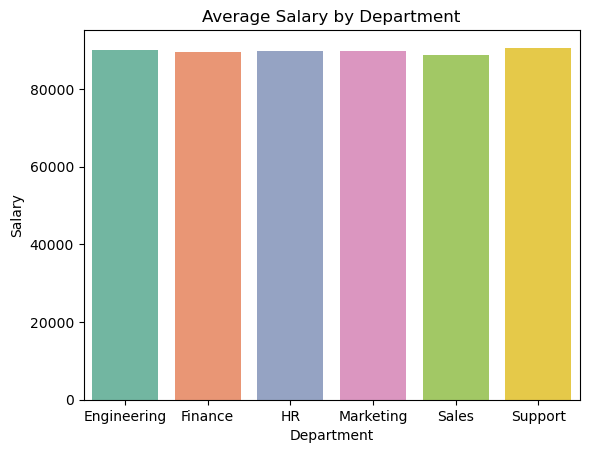

In [24]:
avg_salary = df.groupby('Department')['Salary'].mean().reset_index()
sns.barplot(x='Department', y='Salary', data=avg_salary, palette='Set2')
plt.title('Average Salary by Department')
plt.show()

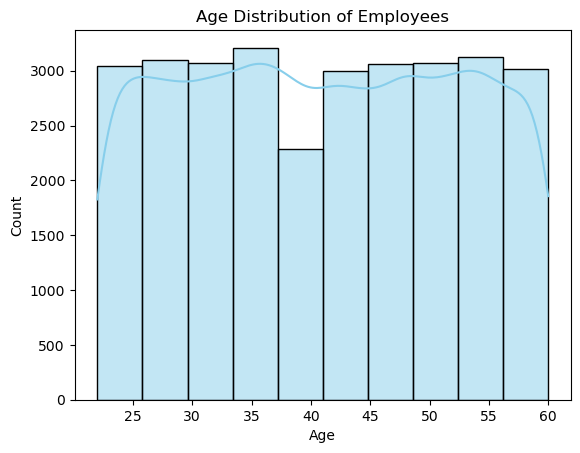

In [25]:
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.show()


C:\Users\gokul\AppData\Local\Temp\ipykernel_13148\379431317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Employee_Count', data=country_count, palette='Set1')


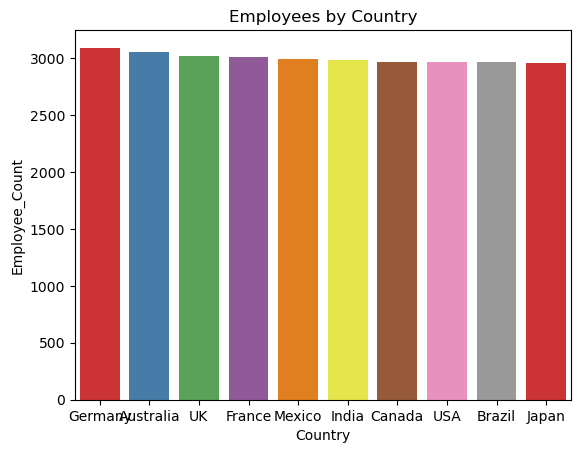

In [27]:
country_count = df['Country'].value_counts().reset_index()
country_count.columns = ['Country', 'Employee_Count']
sns.barplot(x='Country', y='Employee_Count', data=country_count, palette='Set1')
plt.title('Employees by Country')
plt.show()


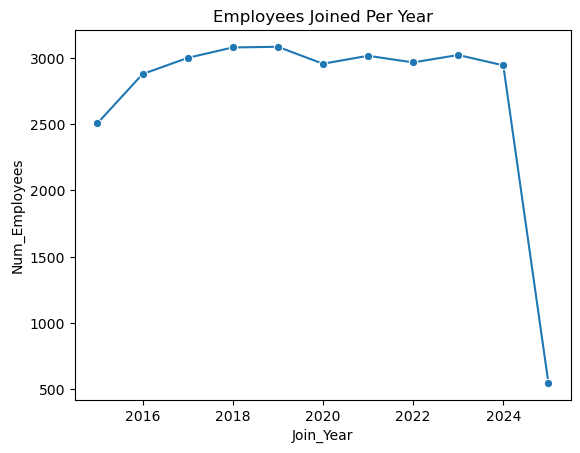

In [28]:
df['Join_Year'] = pd.to_datetime(df['Joining_Date']).dt.year
join_year = df.groupby('Join_Year').size().reset_index(name='Num_Employees')
sns.lineplot(x='Join_Year', y='Num_Employees', data=join_year, marker='o')
plt.title('Employees Joined Per Year')
plt.show()


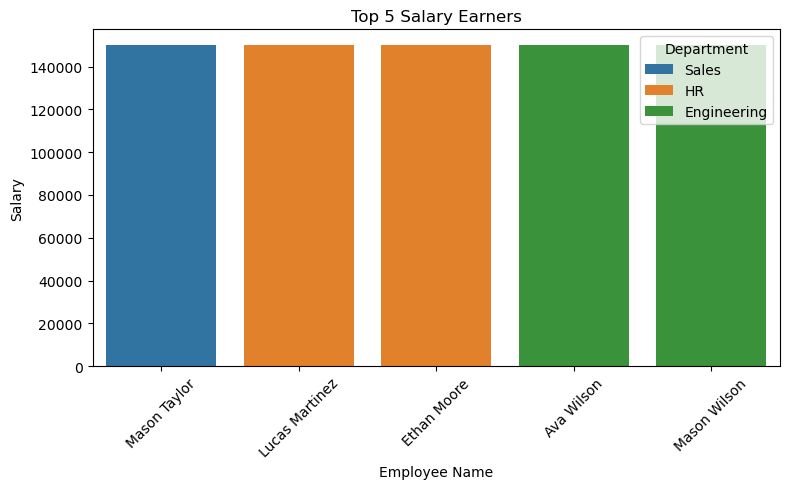

In [31]:
# Get top 5 salary earners
top_5_salary = df.nlargest(5, 'Salary')[['Employee_Name', 'Department', 'Salary']]

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='Employee_Name', y='Salary', data=top_5_salary, hue='Department', dodge=False)

plt.title('Top 5 Salary Earners')
plt.xlabel('Employee Name')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()